In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


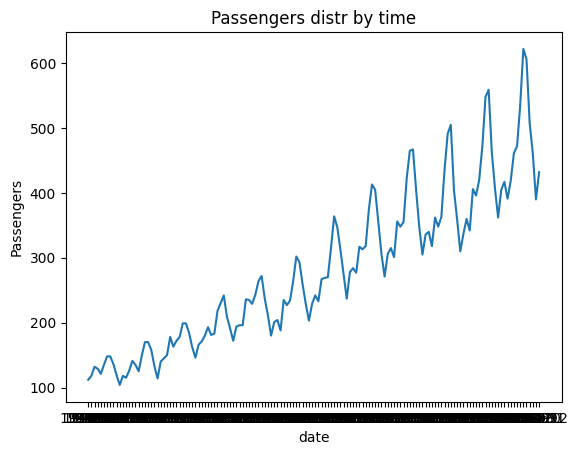

<PandasArray>
['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06', '1949-07',
 '1949-08', '1949-09', '1949-10',
 ...
 '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
 '1960-10', '1960-11', '1960-12']
Length: 144, dtype: object


In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/AirPassengers.csv')
print(data)

plt.plot(data['Month'], data['#Passengers'])
plt.xlabel('date')
plt.ylabel('Passengers')
plt.title('Passengers distr by time')
plt.show()

print(pd.array(data['Month']))

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
# print(data)

# plt.plot(data['Month'], data['#Passengers'])
# plt.xlabel('date')
# plt.ylabel('Passengers')
# plt.title('Passengers distr by time')
# plt.show()

In [3]:
# Split the data into train and test sets
train_data = data[:'1960-03']
test_data = data['1960-03':]


In [4]:
# ARIMA Model
arima_model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start='1960-03', end='1960-12')


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [5]:
mse_arima = mean_squared_error(test_data['#Passengers'], arima_predictions)
mae_arima = mean_absolute_error(test_data['#Passengers'], arima_predictions)
rmse_arima = np.sqrt(mse_arima)
print(mae_arima, rmse_arima)

32.499880151495475 35.431820064304866


In [6]:
# SARIMA Model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start='1960-03', end='1960-12')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43986D+00    |proj g|=  8.52414D-02


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.42688D+00    |proj g|=  4.06882D-02

At iterate   10    f=  3.41967D+00    |proj g|=  9.43977D-03

At iterate   15    f=  3.41609D+00    |proj g|=  2.54115D-03

At iterate   20    f=  3.41579D+00    |proj g|=  3.90832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   3.891D-06   3.416D+00
  F =   3.4157812028724437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [7]:
mse_sarima = mean_squared_error(test_data['#Passengers'], sarima_predictions)
mae_sarima = mean_absolute_error(test_data['#Passengers'], sarima_predictions)
rmse_sarima = np.sqrt(mse_sarima)
print(mae_sarima, rmse_sarima)

32.499880151495475 35.431820064304866


In [8]:
# SARIMAX Model
sarimax_model = SARIMAX(train_data,  order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model_fit = sarimax_model.fit()
sarimax_predictions = sarimax_model_fit.predict(start='1960-03', end='1960-12')


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43986D+00    |proj g|=  8.52414D-02


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.42688D+00    |proj g|=  4.06882D-02

At iterate   10    f=  3.41967D+00    |proj g|=  9.43977D-03

At iterate   15    f=  3.41609D+00    |proj g|=  2.54115D-03

At iterate   20    f=  3.41579D+00    |proj g|=  3.90832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   3.891D-06   3.416D+00
  F =   3.4157812028724437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [9]:
mse_sarimax = mean_squared_error(test_data['#Passengers'], sarimax_predictions)
mae_sarimax = mean_absolute_error(test_data['#Passengers'], sarimax_predictions)
rmse_sarimax = np.sqrt(mse_sarimax)
print(mae_sarimax, rmse_sarimax)

32.499880151495475 35.431820064304866


In [10]:
# Print the predictions
print("ARIMA Predictions:")
print(arima_predictions)
print("\nSARIMA Predictions:")
print(sarima_predictions)
print("\nSARIMAX Predictions:")
print(sarimax_predictions)


ARIMA Predictions:
1960-03-01    451.189511
1960-04-01    413.684594
1960-05-01    434.215450
1960-06-01    493.343362
1960-07-01    566.256947
1960-08-01    579.229151
1960-09-01    478.922099
1960-10-01    425.375166
1960-11-01    380.942946
1960-12-01    422.220997
Freq: MS, Name: predicted_mean, dtype: float64

SARIMA Predictions:
1960-03-01    451.189511
1960-04-01    413.684594
1960-05-01    434.215450
1960-06-01    493.343362
1960-07-01    566.256947
1960-08-01    579.229151
1960-09-01    478.922099
1960-10-01    425.375166
1960-11-01    380.942946
1960-12-01    422.220997
Freq: MS, Name: predicted_mean, dtype: float64

SARIMAX Predictions:
1960-03-01    451.189511
1960-04-01    413.684594
1960-05-01    434.215450
1960-06-01    493.343362
1960-07-01    566.256947
1960-08-01    579.229151
1960-09-01    478.922099
1960-10-01    425.375166
1960-11-01    380.942946
1960-12-01    422.220997
Freq: MS, Name: predicted_mean, dtype: float64


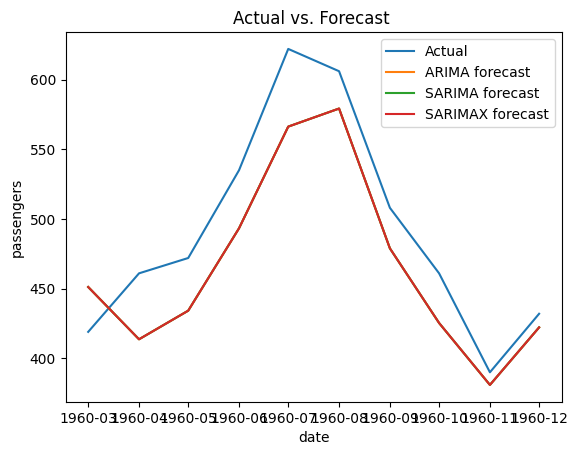

In [13]:
plt.plot(test_data.index, test_data['#Passengers'], label='Actual')
plt.plot(test_data.index, arima_predictions, label='ARIMA forecast')
plt.plot(test_data.index, sarima_predictions, label='SARIMA forecast')
plt.plot(test_data.index, sarimax_predictions, label='SARIMAX forecast')
plt.xlabel('date')
plt.ylabel('passengers')
plt.title('Actual vs. Forecast ')
plt.legend()
plt.show()


all of them give us the same result